In [ ]:
import numpy as np
def Jacobi(A, b2, iter_n, initial_guess=0):
    n = len(A)
    
    D = np.diag(A)
    R = A - np.diag(D)
    x_i = initial_guess * np.ones(n)
    for i in range(iter_n):
        x_ii = (b2 - R.dot(x_i)) / D
    
        x_i=x_ii
    return x_i

In [ ]:
def Gauss_Seidel(A, b, iter_n, initial_guess=0):
    n = len(A)
    
    D = np.diag(A)
    L = np.tril(A) - np.diag(D)
    U = np.triu(A) - np.diag(D)
    
    x_i = initial_guess * np.ones(n)
    x_ii = x_i.copy()
    
    for i in range(iter_n):
        for k in range(n):
            x_ii[k] = (b[k] - U[k].dot(x_i) - L[k].dot(x_ii)) / D[k]
#print('error_inf_norm: ', np.linalg.norm(x_i-x_ii, ord=np.inf))
        x_i = x_ii.copy()
        
    return x_i

In [ ]:
def SOR(A, b, w, iter_n, initial_guess=0):
    n = len(A)
    
    D = np.diag(A)
    L = np.tril(A) - np.diag(D)
    U = np.triu(A) - np.diag(D)
    
    x_i = initial_guess * np.ones(n)
    
    for i in range(iter_n):
        print('x_',i,'=',x_i)
        x_i = np.linalg.inv(w*L + np.diag(D)).dot((1 - w)*np.diag(D).dot(x_i) - w*U.dot(x_i)) + \
        w*np.linalg.inv(np.diag(D) + w*L).dot(b)
        
    return x_i

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# 对称正定矩阵的性质

In [1]:
def Lmatrix(n):
    a=np.zeros((n,n),dtype=float)
    for i in range(n):
        for j in range(0,i+1,1):
            a[i,j]=np.random.rand()
    return a

In [2]:
import numpy as np
L=Lmatrix(3)
print(L)
Lt=np.transpose(L)
print(Lt)

[[0.38759988 0.         0.        ]
 [0.59944357 0.79953994 0.        ]
 [0.95206205 0.78029396 0.17632559]]
[[0.38759988 0.59944357 0.95206205]
 [0.         0.79953994 0.78029396]
 [0.         0.         0.17632559]]


In [3]:
A=np.dot(L,Lt)
print(A)

[[0.15023367 0.23234426 0.36901913]
 [0.23234426 0.9985967  1.19458365]
 [0.36901913 1.19458365 1.54637151]]


In [4]:
w, v = np.linalg.eig(A)
print('eigenvalues: ',w)
print('feature vector: ',v)

eigenvalues:  [2.57554039 0.1090281  0.01063338]
feature vector:  [[-0.17597552 -0.78200707 -0.59791099]
 [-0.61075503  0.56308344 -0.5567004 ]
 [-0.77201743 -0.2672115   0.57670366]]


In [8]:
v.T.dot(v)

array([[ 1.00000000e+00,  4.26685980e-16,  1.14748763e-17],
       [ 4.26685980e-16,  1.00000000e+00, -1.46613698e-16],
       [ 1.14748763e-17, -1.46613698e-16,  1.00000000e+00]])

In [7]:
v.T.dot(A.dot(v))

array([[ 2.57554039e+00,  4.53653573e-16, -3.98597145e-16],
       [ 4.14689522e-16,  1.09028100e-01, -1.78903240e-18],
       [-4.34980412e-16, -3.27397003e-17,  1.06333837e-02]])

In [16]:
print(v[:,1])
#print(v[1].dot(v[:,1]))
print(A.dot(v[:,1])/v[:,1])

[-0.78200707  0.56308344 -0.2672115 ]
0.9434344595945352
[0.1090281 0.1090281 0.1090281]


In [7]:
print(np.linalg.eigvals(A))

[1.7328786e+00 2.2154517e-07 1.0350158e-01]


In [16]:
x=np.random.rand(3)
print(x)
E1=np.dot(np.transpose(x),A)
E2=np.dot(E1,x)
print(E2)

[0.14072956 0.96048578 0.47598959]
0.8437645591480936


# 楚列斯基分解

In [20]:
import numpy as np
def cholesky(A):
    n = A.shape[0]
    L = np.tril(A,0)
    for j in range(n):
        for k in range(j):
            L[j,j]=L[j,j]-L[j,k]**2
        L[j,j]=L[j,j]**(1/2)
        for i in range(j+1,n):
            for k in range(j):
                L[i,j]=L[i,j]-L[i,k]*L[j,k]
            L[i,j]=L[i,j]/L[j,j]
    return L

In [17]:
print(np.tril([[1,2,3],[4,5,6],[7,8,9],[10,11,12]]))
print(np.tril([[1,2,3],[4,5,6],[7,8,9],[10,11,12]],0))
print(np.tril([[1,2,3],[4,5,6],[7,8,9],[10,11,12]],1))
print(np.tril([[1,2,3],[4,5,6],[7,8,9],[10,11,12]],2))

[[ 1  0  0]
 [ 4  5  0]
 [ 7  8  9]
 [10 11 12]]
[[ 1  0  0]
 [ 4  5  0]
 [ 7  8  9]
 [10 11 12]]
[[ 1  2  0]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


In [18]:
A=np.array([[4,2,6],[2,2,5],[6,5,22]],dtype=float)

In [21]:
CL=cholesky(A)
print(CL)

[[2. 0. 0.]
 [1. 1. 0.]
 [3. 2. 3.]]


# 与LU分解对应

In [24]:
def LU(A):
    m = A.shape[0]
    L = np.identity(m)
    U = A.copy()

    for i in range(m):
        for j in range(i+1, m):
            if U[i, i] == 0:
                raise ValueError("The matrix contains a zero pivot.")
            a = U[j, i] / U[i, i]
            L[j, i] = a
            U[j] -= a * U[i]  
    return L, U

In [25]:
ll,uu=LU(A)
print(ll)
print(uu)

[[1.  0.  0. ]
 [0.5 1.  0. ]
 [1.5 2.  1. ]]
[[4. 2. 6.]
 [0. 1. 2.]
 [0. 0. 9.]]


In [26]:
dd=np.diag((CL[0,0]**2,CL[1,1]**2,CL[2,2]**2))
print(dd)

[[4. 0. 0.]
 [0. 1. 0.]
 [0. 0. 9.]]


In [28]:
ll.dot(np.sqrt(dd))

array([[2., 0., 0.],
       [1., 1., 0.],
       [3., 2., 3.]])

In [27]:
#D.ll^T  = U
np.dot(dd,np.transpose(ll))

array([[4., 2., 6.],
       [0., 1., 2.],
       [0., 0., 9.]])

# 迭代的问题

In [33]:
A=np.array([[3, 1],
             [1,2]])
b=np.array([5,5])
x0=np.array([0,0])

def Jacobi(A, b2, iter_n, initial_guess=0):
    n = len(A)
    
    D = np.diag(A)
    print(D)
    print(np.diag(D))
    R = A - np.diag(D)
    x_i = initial_guess * np.ones(n)
    for i in range(iter_n):
        print('x_',i,'=',x_i)
        x_i = (b2 - R.dot(x_i)) / D
    
    return x_i

print(Jacobi(A,b,20,0))

[3 2]
[[3 0]
 [0 2]]
x_ 0 = [0. 0.]
x_ 1 = [1.66666667 2.5       ]
x_ 2 = [0.83333333 1.66666667]
x_ 3 = [1.11111111 2.08333333]
x_ 4 = [0.97222222 1.94444444]
x_ 5 = [1.01851852 2.01388889]
x_ 6 = [0.99537037 1.99074074]
x_ 7 = [1.00308642 2.00231481]
x_ 8 = [0.9992284  1.99845679]
x_ 9 = [1.0005144 2.0003858]
x_ 10 = [0.9998714 1.9997428]
x_ 11 = [1.00008573 2.0000643 ]
x_ 12 = [0.99997857 1.99995713]
x_ 13 = [1.00001429 2.00001072]
x_ 14 = [0.99999643 1.99999286]
x_ 15 = [1.00000238 2.00000179]
x_ 16 = [0.9999994  1.99999881]
x_ 17 = [1.0000004 2.0000003]
x_ 18 = [0.9999999 1.9999998]
x_ 19 = [1.00000007 2.00000005]
[0.99999998 1.99999997]


# 共轭梯度法

In [1]:
def conj_grad_method(A, b, initial_guess=0, iter_num=0):
    n = len(A)
    x = initial_guess * np.ones(n)
    r = b - A.dot(x)
    d = r
    
    if iter_num == 0:
        iter_num = n

    for _ in range(iter_num):
        alpha = r.dot(r) / d.dot(A).dot(d)
        x = x + alpha*d
        beta = np.dot(r - alpha*A.dot(d), r - alpha*A.dot(d)) / r.dot(r)
        r = r - alpha*A.dot(d)
        d = r + beta*d
        
        if r.max() == 0:
            break
    
    return x

In [2]:
import numpy as np
def A_ij(n):
    A = np.zeros((n, n))
    for i in range(n):
        A[i,n-1-i]=0.5
    for i in range(n):
        A[i, i] = 3
        if i < n-1:
            A[i, i+1] = -1
            A[i+1, i] = -1

    return A
def b_i(n):
    b=np.zeros(n)
    for i in range(n):
        b[i]=1.5
    b[0]=2.5
    b[n-1]=2.5
    n2=int(n/2)
    b[n2-1]=1
    b[n2]=1
    return b

In [35]:
def Jacobi(A, b, iter_n, initial_guess=0):
    n = len(A)
    D = np.diag(A)
    R = A - np.diag(D)
    x_i = initial_guess * np.ones(n)
    for i in range(iter_n):
        x_i = (b - R.dot(x_i)) / D
    return x_i

In [4]:
A=A_ij(20000)
b=b_i(20000)
x0=np.zeros(20000)
xr=np.ones(20000)
xb=Jacobi(A,b,20,x0)
print('Jacobi: ',xb)
print('error_inf_norm: ', np.linalg.norm(xr-xb, ord=np.inf))

Jacobi:  [0.99992398 1.00013865 0.99981978 ... 0.99981978 1.00013865 0.99992398]
error_inf_norm:  0.00019426990440885028


In [6]:
A=A_ij(2000)
print('||A-1||_inf: ', np.linalg.norm(np.linalg.inv(A),ord=np.inf))

||A-1||_inf:  2.0000000000000013


In [8]:
A=A_ij(2000)
print('||A||_inf: ', np.linalg.norm(A,ord=np.inf))

||A||_inf:  5.5


In [9]:
A=A_ij(20000)
b=b_i(20000)
print(b.shape)
x0=np.zeros(20000)
xr=np.ones(20000)
#print('||A||_inf: ', np.linalg.norm(A,ord=np.inf))
#print('||A-1||_inf: ', np.linalg.norm(np.linalg.inv(A),ord=np.inf))
xb=conj_grad_method(A,b,x0,20)
print('conj_grad: ',xb)
print('error_inf_norm: ', np.linalg.norm(xr-xb, ord=np.inf))

(20000,)
conj_grad:  [1. 1. 1. ... 1. 1. 1.]
error_inf_norm:  2.0816526280498238e-10


# 预条件

In [11]:
r=np.array([1,2])
a=np.array([[1,2],[3,4]])
print(r.dot(a))
print(a.dot(r))

[ 7 10]
[ 5 11]


In [23]:
def Preconditioned_CGM(A, b, precondition, initial_guess=0, iter_num=0):
    n = len(A)
    
    if precondition == "Jacobi":
        M = np.diag(A)
        M_inv = np.diag(1/M)
    
    elif precondition == "Gauss_Seidel":
        D = np.diag(A)
        M = (np.tril(A)/D).dot(np.triu(A))
        M_inv = np.linalg.inv(M)
    
    else:
        raise ValueError("Please give the right preconditioner!")
    
    x = initial_guess * np.ones(n)
    r = b - A.dot(x)
    d = r.dot(M_inv) # sss
    z = d
    
    if iter_num == 0:
        iter_num = n
    
    for _ in range(iter_num):
        alpha = r.dot(z) / d.dot(A).dot(d)
        x = x + alpha*d
        beta = np.dot(r - alpha*A.dot(d), (r - alpha*A.dot(d)).dot(M_inv)) / r.dot(z) # sss
        r = r - alpha*A.dot(d)
        z = r.dot(M_inv) # sss
        d = z + beta*d
        
        if r.max() == 0:
            break    
    
    return x

# 例

In [13]:
def A_ij(n):
    A = np.zeros((n, n))
    for i in range(n):
        A[i,i]=(i+1)**(1/2)
        if i+10<n:
            A[i,i+10]=np.cos(i+1)
            A[i+10,i]=np.cos(i+1)
    return A

In [14]:
import numpy as np
print(A_ij(11))

[[1.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.54030231]
 [0.         1.41421356 0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.         0.         1.73205081 0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.         2.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         2.23606798 0.
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         2.44948974
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  2.64575131 0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         2.82842712 0.         0.         0.        ]
 [0.         0.         0.         0.         0.

In [15]:
import numpy as np
def cond(A):  # inf-范数
    return abs(A).sum(axis=1).max() * abs(np.linalg.inv(A)).sum(axis=1).max()

In [18]:
print(cond(A_ij(5000)))

92.50398081163272


In [19]:
M = np.diag(A_ij(5000))
M_inv = np.diag(1/M)
print(cond(M_inv.dot(A_ij(5000))))

3.331174855364081


In [20]:
A=A_ij(500)
D = np.diag(A)
M = (np.tril(A)/D).dot(np.triu(A))
M_inv = np.linalg.inv(M)
print(cond(M_inv.dot(A)))

1.3356637473804416


In [40]:
A=A_ij(500)
print(A.shape)
xr=np.ones(500)
b=A.dot(xr)
print(b.shape)
x0=np.zeros(500)
xb=conj_grad_method(A,b,x0,10)
print('conj_grad: ',xb)

(500, 500)
(500,)
conj_grad:  [0.85824895 0.95292374 0.94051164 1.02477394 1.02740622 1.00485983
 1.01148302 1.02794112 1.03229156 1.03232128 1.04031383 0.98089115
 0.96233892 1.00545694 0.99803135 0.99158539 0.98343757 0.99641396
 1.01785129 1.01437542 0.98989331 0.9942185  1.00041992 0.99292335
 1.00680998 1.00099333 0.98984865 0.99076878 0.98693723 0.99376816
 1.00119229 0.9986131  0.99403819 0.99594299 0.9932049  0.99784147
 1.00175058 0.99664117 0.99398939 0.99945495 0.99998472 1.00185282
 1.00392145 0.99848723 0.99593216 1.00151041 1.00344355 1.00478093
 1.00563466 1.00039098 0.99838497 1.00268937 1.00483511 1.00553902
 1.00626293 1.00163565 0.99999236 1.00324561 1.00519364 1.0050325
 1.00571316 1.00201362 1.00068737 1.00317451 1.00502585 1.0039407
 1.0044488  1.00159484 1.00063299 1.00264563 1.00445371 1.00276584
 1.00288967 1.0007027  1.00001915 1.00184941 1.0035424  1.0017458
 1.00133697 0.99972151 0.99903778 1.00094272 1.00246574 1.00087669
 0.99998857 0.99887886 0.99796163 1

In [24]:
Preconditioned_CGM(A,b,'Jacobi',0,10)

array([1.00000041, 1.00000038, 0.99999992, 0.99999969, 0.99999982,
       0.9999996 , 1.00000042, 0.99999999, 0.99999984, 0.99999985,
       0.99999918, 1.00000039, 0.99999987, 1.00000001, 1.0000002 ,
       1.00000093, 1.00000042, 0.99999991, 0.99999911, 1.00000014,
       1.00000004, 0.99999958, 1.00000004, 0.99999997, 1.        ,
       1.00000004, 0.9999999 , 0.99999989, 1.00000036, 1.00000009,
       1.00000004, 1.00000014, 1.00000003, 0.99999996, 1.00000015,
       0.99999975, 0.99999986, 0.99999987, 1.0000003 , 0.99999998,
       1.00000005, 0.99999999, 0.99999993, 1.00000008, 1.00000021,
       1.00000001, 1.00000007, 1.00000011, 0.99999995, 0.99999996,
       0.99999994, 0.99999989, 1.00000001, 1.00000013, 0.9999999 ,
       0.99999987, 1.00000009, 1.00000009, 1.00000002, 1.00000015,
       0.99999987, 0.99999992, 1.00000014, 1.00000003, 0.99999999,
       1.00000011, 0.99999989, 1.00000001, 1.00000003, 0.99999997,
       0.99999998, 1.00000003, 0.99999996, 1.00000001, 0.99999

In [25]:
Preconditioned_CGM(A,b,'Gauss_Seidel',0,10)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [42]:
x1=np.zeros(40)
x2=np.zeros(40)
x3=np.zeros(40)
x4=np.zeros(40)
x0=np.zeros(500)
xr=np.ones(500)
for i in range(1,40):
    xb=Jacobi(A,b,i,0)
    x4[i-1]=np.linalg.norm(xr-xb, ord=np.inf)
    xb=conj_grad_method(A,b,x0,i)
    x1[i-1]=np.linalg.norm(xr-xb, ord=np.inf)
    xb=Preconditioned_CGM(A,b,'Jacobi',0,i)
    x2[i-1]=np.linalg.norm(xr-xb, ord=np.inf)
    xb=Preconditioned_CGM(A,b,'Gauss_Seidel',0,i)
    x3[i-1]=np.linalg.norm(xr-xb, ord=np.inf)

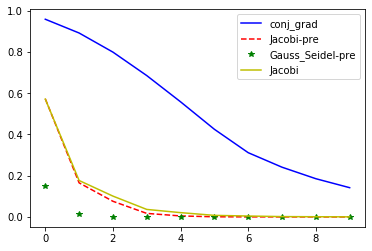

In [45]:
import matplotlib.pyplot as plt
x=np.arange(0,10)
p1, =plt.plot(x,x1[x],'b-')
p2, =plt.plot(x,x2[x],'r--')
p3, =plt.plot(x,x3[x],'g*')
p4, =plt.plot(x,x4[x],'y-')
plt.legend([p1, p2, p3,p4], ['conj_grad', 'Jacobi-pre','Gauss_Seidel-pre','Jacobi'], loc=0)
plt.show()